# Input Result

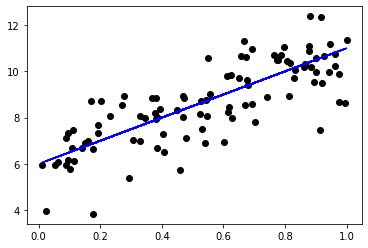

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random x
x = np.random.random(100)

# Get y: add a standard deviation to get a more realistic data
y = 5 * x + 6 + np.random.normal(0, 1 , 100)
y_real = 5 * x + 6

#Print out the plot
plt.scatter(x, y, color='black')
plt.plot(x, y_real, color='blue')
plt.show()

# Output Result

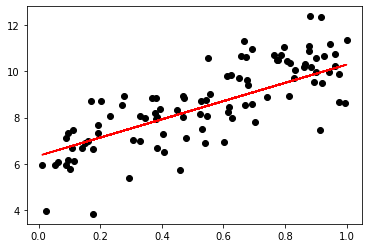

In [7]:
import torch
import torch.nn as nn

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
xp = torch.from_numpy(x).float()
yp = torch.from_numpy(y).float()

#Create model class
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 150

model = linearRegression(inputDim, outputDim)

#Objective function
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

#Traning phase
losses = []
final_loss= 0
theta0 = []
theta1= []
for epoch in range(epochs): 
    # get output from the model, given the inputs
    y_pred = model(xp)

    # get loss for the predicted output
    loss = criterion(y_pred, yp)
    
    losses.append(loss.item())
    
    # Clear gradient buffers
    optimizer.zero_grad()

    # get gradients w.r.t to parameters
    loss.backward()
    
    final_loss = loss.item()

    # update parameters
    optimizer.step()

    # model parameter
    for i, p in enumerate(model.parameters()):
      if p.requires_grad: 
        if i == 0:
          theta0.append(p.data.item())          
        else:
          theta1.append(p.data.item())  

#Prediction
y_pred = model(xp).float()

#Plotting energy values
plt.scatter(x, y, color='black')
plt.plot(xp,y_pred.detach(),color='red')
plt.show()

# Energy Result

Text(0.5, 0, 'epochs')

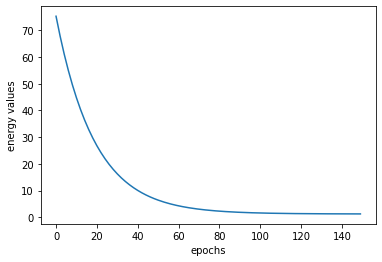

In [8]:
plt.plot(range(epochs), losses)
plt.ylabel('energy values')
plt.xlabel('epochs')

# Model Parameter

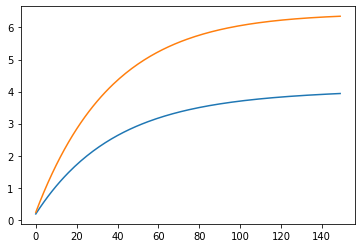

In [9]:
#Plotting theta0
plt.plot(theta0)
#Plotting theta1
plt.plot(theta1)
plt.show()